### Test on ECG Data

The dataset you will use is based on one from [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).

Try to design and train your MLP to classify normal and abnormal ECG samples.

# LOAD DATA

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()
print(type(dataframe))

<class 'pandas.core.frame.DataFrame'>


[[ 1.5225911   0.0901465  -2.3048594  ...  0.35594853 -0.48818377
   0.23199584]
 [ 0.3308203  -2.4158494  -4.0271171  ...  1.4851319   0.11905583
  -2.5969672 ]
 [ 0.30674554 -1.4711163  -2.7270273  ...  1.2166045   0.66671691
   1.1487992 ]
 ...
 [-0.66551119 -2.9743856  -4.4855485  ...  0.94006053  1.4556054
   0.59329534]
 [ 1.1048512  -0.61504694 -2.4357678  ...  0.733911   -0.30058531
  -0.22360552]
 [-2.2252716  -4.0932167  -3.6970107  ...  1.0760468   1.1871031
  -0.6945654 ]]
(3998,)


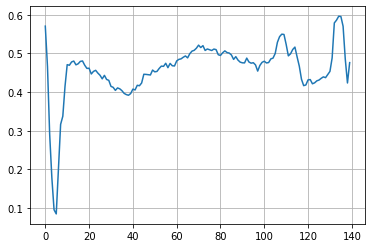

In [8]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=21)
print(train_data)


# Normalize to [0, 1]
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)
print(train_labels.shape)
#print(train_data.shape.as_list())
# plot data
plt.grid()
plt.plot(np.arange(140), train_data[0])
plt.show()

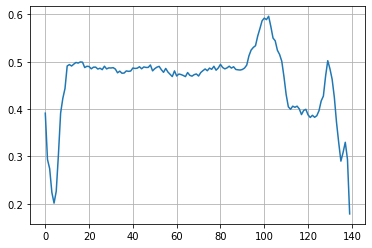

In [ ]:
plt.grid()
plt.plot(np.arange(140), train_data[100])
plt.show()

In [9]:
#X = x_train.reshape(60000,28*28)
np.set_printoptions(threshold=5)
#train_labels = train_labels.T
y1=train_labels
y2=test_labels

test_labels_ae = test_labels
print(train_labels)
digits = 2
examples = train_labels.shape[0]
train_labels = train_labels.reshape(1, examples)
Train_Labels = np.eye(digits)[train_labels.astype('int32')]
Train_Labels = Train_Labels.T.reshape(digits, examples).T
print(train_data.shape)
print(Train_Labels)
print(test_labels.shape)




examples = test_labels.shape[0]
test_labels = test_labels.reshape(1, examples)
Test_Labels = np.eye(digits)[test_labels.astype('int32')]
Test_Labels = Test_Labels.T.reshape(digits, examples).T

print(Test_Labels.shape)


[1. 1. 1. ... 1. 1. 1.]
(3998, 140)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
(1000,)
(1000, 2)


# MLP 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                4512      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 4,578
Trainable params: 4,578
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
125/125 [==============================] - 1s 2ms/step - loss: 0.3408 - accuracy: 0.5994 - val_loss: 0.2305 - val_accuracy: 0.5600
Epoch 2/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2211 - accuracy: 0.6182 - val_loss: 0.2071 - val_accuracy: 0.7300
Epoch 3/50
125/125 [==============================] - 0s 2ms/step - loss: 0.1983 - accuracy: 0.6880 - val_loss: 0.1849 - val_accuracy: 0.7660
Epoch 4/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1778 - accur

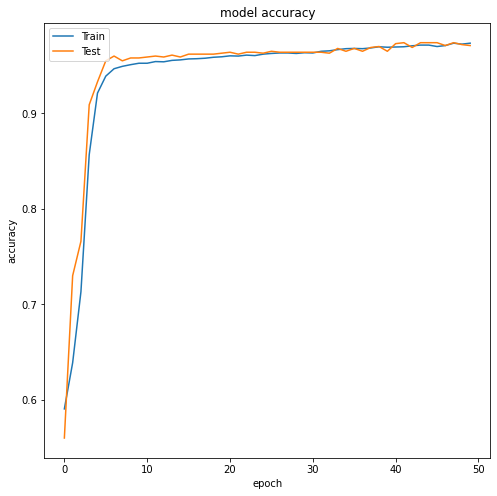

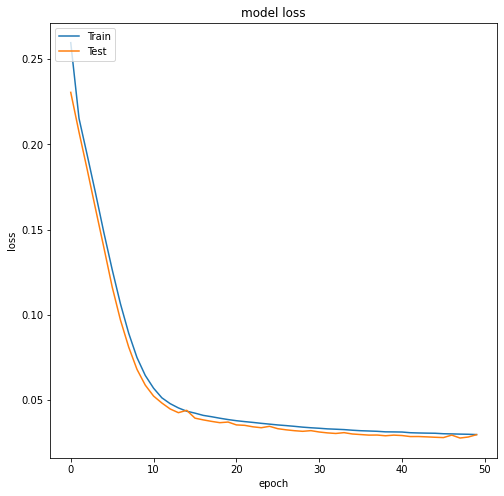

Test loss is : 0.029613055288791656
Test accuracy is : 0.9710000157356262


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import optimizers

#Some parameter settings
batch_size = 32
classes = 2
epochs = 50
learning_rate = 0.02

#MLP
model = Sequential()
#hidden layel sigmoid is used for activation function
model.add(Dense(32, activation='sigmoid', input_shape=(140,)))
#output layel
model.add(Dense(classes))

#optimizers use sgd object, which can add learning rate
sgd = optimizers.SGD(lr=learning_rate)
#model compile loss function use mse function
model.compile(loss='mse',optimizer=sgd,metrics=['accuracy'])
model.summary()
#model fit return a history object
history = model.fit(train_data, Train_Labels,batch_size=batch_size,
           epochs=epochs,verbose=1,validation_data=(test_data, Test_Labels))
#model evaluate
score = model.evaluate(test_data, Test_Labels, verbose=0)


#show the acc figure for train and test set
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#show the loss figure for train and test set
plt.figure(figsize=(8, 8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#print accuracy and loss for test
print('Test loss is :', score[0])
print('Test accuracy is :', score[1])

In [ ]:
print()

# Autoencoder

In [10]:
# Claim models
import keras
import matplotlib.pyplot as plt

# The input size/image
input = keras.Input(shape=(140,))
# The size of latent space
encoding_dim = 64
## Add a simple encode layer
# encoded = keras.layers.Dense(encoding_dim, activation='relu')(input_img)
# You can add encode layer with a L1 activity regularizer
encoded = keras.layers.Dense(encoding_dim, activation='relu', 
                activity_regularizer=keras.regularizers.l1(10e-5))(input)
# Add decode layer
decoded = keras.layers.Dense(140, activation='sigmoid')(encoded)

# Claim autoencoder model
model_autoencoder = keras.Model(input, decoded)

# Claim a separate encoder model
model_encoder = keras.Model(input, encoded)

# Claim a separate decoder model
decoder_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = model_autoencoder.layers[-1]
# Create the decoder model
model_decoder = keras.Model(decoder_input, decoder_layer(decoder_input))
                            
model = keras.Sequential()
model.add(model_encoder.layers[0])
model.add(model_encoder.layers[1])
model.add(keras.layers.Dense(2, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# Train the model, iterating on the data in batches of 32 samples
model.fit(train_data, Train_Labels, epochs=50, batch_size=32)
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
# Overall F1 score
#print(Test_Labels.shape)
test_pred=np.argmax(model.predict(test_data), axis=1)
#print(test_labels.shape)
#print(test_pred.shape)

print("f1_score:",f1_score(test_labels_ae, test_pred, average="macro"))
print("precision_score:",precision_score(test_labels_ae, test_pred, average="macro"))
print("recall_score:",recall_score(test_labels_ae, test_pred, average="macro"))


Epoch 1/50
125/125 [==============================] - 1s 1ms/step - loss: 0.5777 - accuracy: 0.7352
Epoch 2/50
125/125 [==============================] - 0s 1ms/step - loss: 0.2551 - accuracy: 0.9477
Epoch 3/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1487 - accuracy: 0.9516
Epoch 4/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1193 - accuracy: 0.9585
Epoch 5/50
125/125 [==============================] - 0s 1ms/step - loss: 0.1012 - accuracy: 0.9621
Epoch 6/50
125/125 [==============================] - 0s 1ms/step - loss: 0.0828 - accuracy: 0.9738
Epoch 7/50
125/125 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9781
Epoch 8/50
125/125 [==============================] - 0s 1ms/step - loss: 0.0757 - accuracy: 0.9753
Epoch 9/50
125/125 [==============================] - 0s 1ms/step - loss: 0.0589 - accuracy: 0.9802
Epoch 10/50
125/125 [==============================] - 0s 1ms/step - loss: 0.0722 - accuracy: 0.9782